## <p style="text-align: center;">Iris Classifier</p>

<p style="text-align: center;">A simple three layered Feed-Forward Neural Network</p>

In [89]:
import pandas as pd
import numpy as np
import scipy.special
import random
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [90]:
Data = pd.read_csv('./IRIS.csv')

#Display five random entries
Data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,Iris-setosa
97,6.2,2.9,4.3,1.3,Iris-versicolor
120,6.9,3.2,5.7,2.3,Iris-virginica
38,4.4,3.0,1.3,0.2,Iris-setosa
69,5.6,2.5,3.9,1.1,Iris-versicolor


To make prediction easy we are going to assume:
- Iris-setosa as 0
- Iris-versicolor as 1
- Iris-virginica as 2

In [91]:
Data = Data.replace('Iris-setosa',0)
Data = Data.replace('Iris-versicolor',1)
Data = Data.replace('Iris-virginica',2)

#Shuffling the Data Set and keeping the Index the same
Data = Data.sample(frac=1).reset_index(drop=True)

#Display the 1st five entries
Data.iloc[0:6,:]  #iloc Fn is used to enable integer based indexing

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,4.0,1.2,0.2,0
1,6.4,2.7,5.3,1.9,2
2,5.1,3.4,1.5,0.2,0
3,7.3,2.9,6.3,1.8,2
4,6.3,3.3,4.7,1.6,1
5,7.7,2.8,6.7,2.0,2


### Visualizing the Data

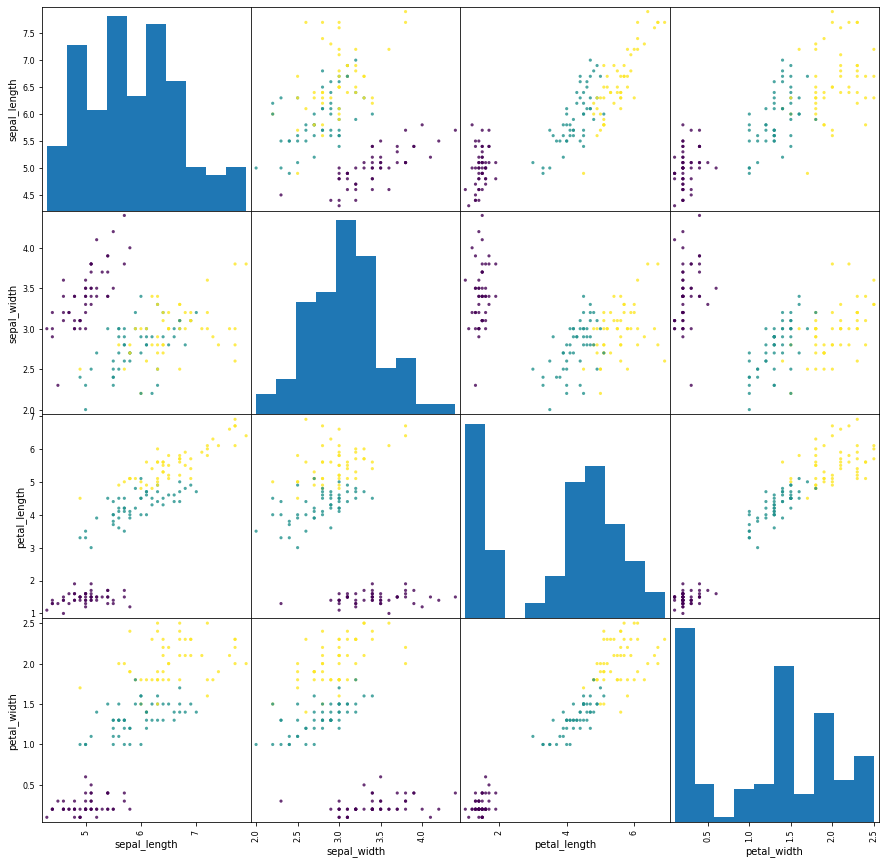

In [92]:
scatter_matrix(Data.iloc[:,:4],c=Data['species'],figsize=(15,15),marker='o', s=10,alpha=.8)
plt.show()

In [93]:
#Mean Normalizing the Data
def normalize(dataset):
    dataNorm=(dataset-dataset.mean())/(dataset.std())
    return dataNorm

#Normalizing except the species column
Data.iloc[:,:4] = normalize(Data.iloc[:,:4]) 

#Display the 1st five entries
Data.iloc[0:6,:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.052331,2.181763,-1.450146,-1.308593,0
1,0.672249,-0.816431,0.873564,0.918985,2
2,-0.897674,0.797981,-1.280118,-1.308593,0
3,1.759119,-0.355171,1.440322,0.787951,2
4,0.551486,0.567351,0.533509,0.525883,1
5,2.242172,-0.585801,1.667025,1.050019,2


In [94]:
#Splitting the Data into Test and Training set

Data_Train = Data.values

m = Data_Train.shape[0] #No of training sample ie 135
n = Data.values.shape[1]-1 #No of features ie 4

nHiddenNodes = 10 #No of Hidden Nodes 
nOutPutNodes = 3 #No of Output Nodes
lr = 0.1 #Learning Rate

In [95]:
np.random.seed(10)
Wih = np.random.normal(0.0,pow(n,-0.5),(nHiddenNodes,n)) #Weights between Input Layer and Hidden Layer
Who = np.random.normal(0.0,pow(n,-0.5),(nOutPutNodes,nHiddenNodes)) #Weights between Hidden Layer and Output Layer

activation_function=lambda x:scipy.special.expit(x)

print("Shape of the Wih is:",Wih.shape)
print("Shape of the Who is:",Who.shape)

Shape of the Wih is: (10, 4)
Shape of the Who is: (3, 10)


### Training Phase

In [96]:
EHist = []
def Train(Inputs,Targets,Wih,Who,lr): #Inputs is 4x1 and TarWihgets is a 3x1 matrix
    #calculate the summation of signals into hidden layer
    hidden_inputs = np.dot(Wih,Inputs)
    #calculaing the Hidden Output
    hidden_outputs = activation_function(hidden_inputs).reshape(nHiddenNodes,1)

    #calculate the summation of signals into output layer
    final_inputs = np.dot(Who, hidden_outputs)
    #calculaing the Final Output
    final_outputs = activation_function(final_inputs)

    # output layer error is the (target - actual)
    output_errors = Targets - final_outputs
    # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
    hidden_errors = np.dot(Who.T, output_errors)
    
    EHist.append(np.square(np.sum(a = output_errors)))
    
    # update the weights for the links between the hidden and output layers
    Who += lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))    
    # update the weights for the links between the input and hidden layers
    Wih += lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(Inputs)) 
    
    return Wih,Who


epochs = 800
for e in range(epochs):
    # go through all records in the training data set
    for record in Data_Train:
        targets = np.zeros(nOutPutNodes).reshape(3,1)
        targets[int(record[4])]=1
        Wih,Who = Train(record[0:4].reshape(4,1),targets,Wih,Who,lr)

In [97]:
def query(inputs,Wih,Who):
    # calculate signals into hidden layer
    hidden_inputs = np.dot(Wih,inputs)
    # calculate the signals emerging from hidden layer
    hidden_outputs = activation_function(hidden_inputs)
        
    # calculate signals into final output layer
    final_inputs = np.dot(Who, hidden_outputs)
    # calculate the signals emerging from final output layer
    final_outputs = activation_function(final_inputs)
    return final_outputs 

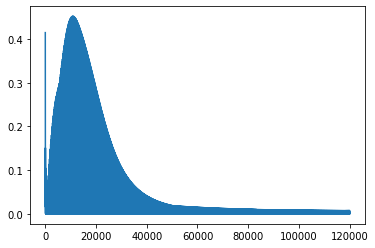

In [98]:
#plotting sum of square Error
plt.plot(EHist)

In [99]:
scorecard = []
for record in Data_Train:
    output = query(record[:4].reshape(4,1),Wih,Who)
    if(int(record[4]) == np.argmax(output)):
        scorecard.append(1)
    else:
        scorecard.append(0)
        
scorecard_array = np.asarray(scorecard)
print ("performance = ", (scorecard_array.sum() / scorecard_array.size)*100,"% Accurate")              

performance =  98.66666666666667 % Accurate
